## Classification algorithms

#### Logistic classification:
Fits a linear decision boundary to separate the classes. 

<img src="https://camo.githubusercontent.com/f663cd4f29335972950dded4d422c07aeee8af55/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f313630302f312a34473067737539327250684e2d636f397076315035414032782e706e67" width="300" height="250" />
<p style="text-align: center;"> Logistic Regression classifier </p>

Terminology:  
* Features
* Target

**Revision:**  
As we learned in the previous session, the equation for simple linear regression is 

$$y_{pred} = w*x+b $$

Similarly, the linear regression for more than one features, say $x_1, x_2, \dots, x_n$ is given by

$$y_{pred} = w_1*x_1 + w_2*x_2 + \cdots + w_n*x_n + b$$

We note that the equation corresponds to a $n-1$ dimensional linear hyperplane in a $n$-dimensional space.

$$sig(t) = \frac{1}{1+e^{-t}}$$

<img src="https://upload.wikimedia.org/wikipedia/commons/5/53/Sigmoid-function-2.svg" width=400 />

The S-shaped curve is called sigmoid because of its shape and it was widely used in population growth models in the previous century and hence, the [name logistic](https://en.wikipedia.org/wiki/Logistic_function).


**Binary Logistic regression**:
For binary classification, we assign the two classes the labels 0 and 1. The classifier predicts the probability ($p$) that a point belongs to the class labeled $1$. The probability for the class labeled $0$ will be $1-p$.

The equation for logistic regression is 

$$Prob(y=1) = sig(w_1*x_1 + w_2*x_2 + \cdots + w_n*x_n + b) $$ 

where $sig$ is the sigmoid logistic function defined above. 

Observations:
* The output of the sigmoid lies between 0 and 1, which corresponds to the probability in our case. 
* The logistic function (and hence the probability) approximates to 1 for the large positive values, whereas it converges to 0 for large negative values. 


For points with label $y=1$, the cost is

$$ c(y, p) = - \log(p) \ \ \ \ \ \ \ \ \ \text{ if }\ \  y = 1$$

whereas for points with label $y=0$, the cost is

$$ c(y, p) = - \log(1-p) \ \  \text{ if }\ \  y = 0$$

The cost function takes the average over the costs for all points.

$$ J = \frac{1}{N} \sum_{i=1}^N c(y, p) = - \frac{1}{N} \sum_{i=1}^N y \log(p) + (1-y) \log(1-p)$$

where $p=Prob(y=1)$.

The updates to the weights are made in a similar fashion as seen earlier for linear regression by minimizing the cost function using gradient descent algorithm.

We will first generate a dataset suitable for demonstration and applying classification algorithms using built-in function [`make_classification`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) in scikit-learn.

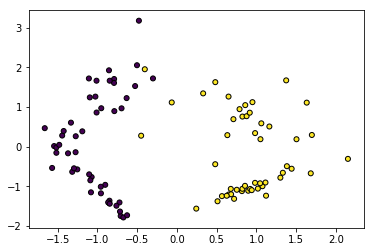

In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, 
                           n_redundant=0, n_informative=2, 
                           n_clusters_per_class=2, 
                           random_state=1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k');

from sklearn.model_selection import train_test_split
# default is 75% / 25% train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

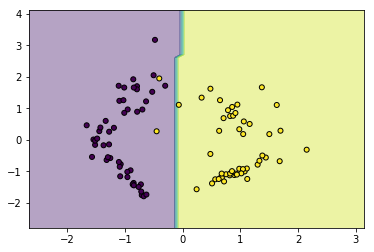

In [2]:
from sklearn.linear_model import LogisticRegression

LR_clf = LogisticRegression()
LR_clf.fit(X_train, y_train)

def plot_decision_boundary(model, X, y):
    x1, x2 = X[:, 0], X[:, 1]
    x1_min, x1_max = x1.min() - 1, x1.max() + 1
    x2_min, x2_max = x2.min() - 1, x2.max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                         np.arange(x2_min, x2_max, 0.1))

    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.scatter(x1, x2, c=y, marker='o',
                s=25, edgecolor='k');
plot_decision_boundary(LR_clf, X, y)

## k-Nearest Neighbors classifier:
- Uses k-nearest neighbors from the training data to predict the label 

![](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/03faee64-e85e-4ea0-a2b4-e5964949e2d1/d99b9a4d-618c-45f0-86d1-388bdf852c1d/images/screenshot.gif)

The default value for k is 5 in scikit-learn implementation.

Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.96


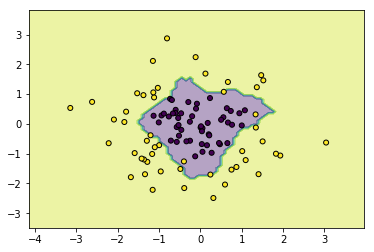

In [3]:
from sklearn.datasets import make_gaussian_quantiles
X1, y1 = make_gaussian_quantiles(n_features=2, 
                                 n_classes=2, 
                                 random_state=12)
X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1, y1, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier().fit(X1_train, y1_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_clf.score(X1_train, y1_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_clf.score(X1_valid, y1_valid)))

plot_decision_boundary(knn_clf, X1, y1)

## k-fold Cross-validation

**Cross-validation**: As we learned in the previous session that to address overfitting and underfitting to the curve, we hold out a validation set to evaluate our model. This valiadation set gives us an estimate for how well our model will generalize to unseen data. We similarly use this validation set to tune the hyperparameters, for example finding the optimal value for the regularization parameter alpha. This cross-validation method has a shortcoming similar to overfitting. The overfitting happens when our model captures noise and patterns present in the training dataset that are not present in the unseen data. It can also happen that our split of the training and validation is not entirely random, and that one of the subset has patterns/characteristics not present in the entire dataset. More commonly, it happens that when we use validation set to tune our hyperparameters, they often overfit to the validation set. For example, we find an optimal value for the regularization parameter using a validation set, and it turned out to be not-so-optimal for the unseen test data. To solve this problem, it is a common practise to use k-fold cross-validation, especially for tuning hyperparameters.
![](https://i.stack.imgur.com/nFkpn.png)

1. Randomly divide the dataset into k-groups
2. For each group, we train the algorithm on the remaining k-1 groups and evaluate its performance on this group treating it as the validation set. 

Thus, we train k different models and have performance scores for each one of them. At the end, we take the median of the scores and also make note of their standard deviation.

![](https://www.spectrumnews.org/wp-content/uploads/2016/08/fig-3-1.gif)